# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('/content/drive/MyDrive/AI/TP4/data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [ ]:
def mapping(X):
    
    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j));
            k=k+1
    return outX    

In [ ]:
X2=mapping(X)
X2.shape

(118, 28)

In [ ]:
X2[0]

array([1.00000000e+00, 5.12670000e-02, 6.99560000e-01, 2.62830529e-03,
       3.58643425e-02, 4.89384194e-01, 1.34745327e-04, 1.83865725e-03,
       2.50892595e-02, 3.42353606e-01, 6.90798869e-06, 9.42624411e-05,
       1.28625106e-03, 1.75514423e-02, 2.39496889e-01, 3.54151856e-07,
       4.83255257e-06, 6.59422333e-05, 8.99809795e-04, 1.22782870e-02,
       1.67542444e-01, 1.81563032e-08, 2.47750473e-07, 3.38066048e-06,
       4.61305487e-05, 6.29470940e-04, 8.58939846e-03, 1.17205992e-01])

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    return 1/(1+np.exp(-z));

Fonction qui initialise la valeur de theta, par défaut elle initialise les valeurs à 0, mais elle peut aussi les initialiser a des valeurs aléatoire

In [ ]:
def init_theta(nb_features, initZero = True):
  if (initZero):
    return np.zeros((nb_features, 1))
  return np.random.rand(nb_features,1) 

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def hest(X, theta):
  return Sigmoid(X @ theta)

In [ ]:
def computeCost(X, y, theta, lambdaa):
    mean = -np.mean(y * np.log(hest(X, theta)) + (1 - y) * np.log(1 - hest(X, theta)))
    regu = (lambdaa/(2*len(y))) * (theta[1:].T @ theta[1:])
    return float(mean + regu)

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, alpha, iterations, lambdaa, initZero = True):
  theta = init_theta(X.shape[1], initZero)
  # initialisation des liste des historiques
  cost_list = []
  thetas_list = np.zeros((iterations, theta.shape[0]))
  theta0_list = []
  theta1_list = []
  theta2_list = []

  H = np.zeros((X.shape[0], 1))
  m = len(y)

  # Sauvegarde de la première valeur 
  cost_list.append((0, computeCost(X, y, theta, lambdaa)))
  theta0_list.append(theta[0])
  theta1_list.append(theta[1])
  theta2_list.append(theta[2])

  for iter in tqdm(range(iterations)):
    H = hest(X, theta)
    thetas_list[iter, :] = theta.flatten()

    theta[0] = theta[0] - alpha * 1/m * (X2.T @ (hest(X2, theta) - y))[0]
    theta[1:] = theta[1:] - alpha * 1/m * (X2.T @ (hest(X2, theta) - y))[1:] + (lambdaa / m) * theta[1:]

    # Sauvegarde des résulat de l'itération
    # thetas_list.append(theta)
    theta0_list.append(theta[0])
    theta1_list.append(theta[1])
    theta2_list.append(theta[2])
    cost_list.append((iter + 1, computeCost(X, y, theta, lambdaa)))
    
  return theta, theta0_list,theta1_list,theta2_list ,np.array(cost_list), thetas_list

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

Calculer le cout initial

In [ ]:
# Initialisation de theta 
theta = np.zeros((X2.shape[1], 1))

# Calcule du cout initial
initialCost=computeCost(X2, y, theta, 1)
print(initialCost)

0.6931471805599454


Appel des la fonction de calcul du gradient

Le nombre d'itération a été calculé par essai (trial and error), nous avons essayé plusieurs valeurs et nous avons trouvé que 213 itération été le nombre qui minimisé le plus la fonction cout, de même pour la valeur de alpha (1) et lambdaa (0.2)

In [ ]:
# paramètres
iterations = 213;
alpha = 1;

# paramètre de regression
lambdaa = 0.2;

# Appel
theta, theta0_list, theta1_list, theta2_list, cost_list, thetas_list = gradientDescent(X2, y, alpha, iterations, lambdaa);

100%|██████████| 213/213 [00:00<00:00, 2730.52it/s]


les valeur de theta après training

In [ ]:
theta.flatten()

array([ 2.21080447e+00,  1.49210988e+00,  2.45876735e+00, -3.71815429e+00,
       -2.14612850e+00, -2.60619177e+00,  4.35791438e-01, -8.43352997e-01,
       -7.85529719e-01, -2.67473595e-01, -2.85131631e+00, -1.84076520e-01,
       -1.24020225e+00, -6.99276434e-01, -2.33223034e+00, -4.12563854e-01,
       -4.81912051e-01, -8.06498580e-02, -6.02389889e-01, -6.96007824e-01,
       -8.73796780e-01, -2.10796274e+00,  1.35193224e-02, -5.95462739e-01,
        3.42049989e-03, -6.78792290e-01, -3.98289550e-01, -1.85559544e+00])

la valeur optimal des theta (voir Renforcement de l'apprentissage pour voir comment les calculer)

In [ ]:
# ([ 1.27273835,  0.62527208,  1.18108752, -2.01995903, -0.91742836, -1.43166197,
#   0.12398098, -0.36553476, -0.35724833, -0.17513043, -1.45814442, -0.05098716,
#  -0.61555482, -0.27470373, -1.1928325,  -0.24217867, -0.20601669, -0.04469701,
#  -0.27778463, -0.29538671, -0.45635611, -1.04319845,  0.02778263, -0.29243595,
#   0.01556179, -0.32739001, -0.14389029, -0.92463469])

Calcule du cout final

In [ ]:
finalCost=computeCost(X2, y, theta, 1)
print(finalCost)

0.6395880400388156


Text(0.5, 1.0, 'Cost function using Gradient Descent')

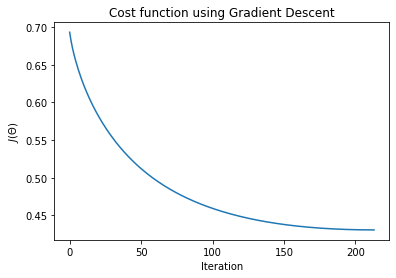

In [ ]:
plt.plot(cost_list[:,1])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawCircle(X1, X2):
    degree = 7
    out = np.ones(1)
    for i in range(1, degree):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [ ]:
def predict(X, theta):
    return Sigmoid(X @ theta)>0.5

# Affichage 
Graphe representant les acceptations selon les caracteristiques

In [ ]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

Text(0, 0.5, 'x 2')

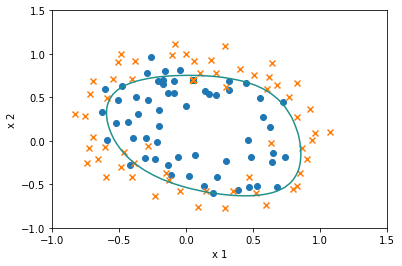

In [ ]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(drawCircle(u[i], v[j]), theta)
plt.contour(u,v,z,0)
plt.xlabel('x 1')
plt.ylabel('x 2')

Traçage du coût en fonction de theta0 et theta1

In [ ]:
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'black', 'purple']

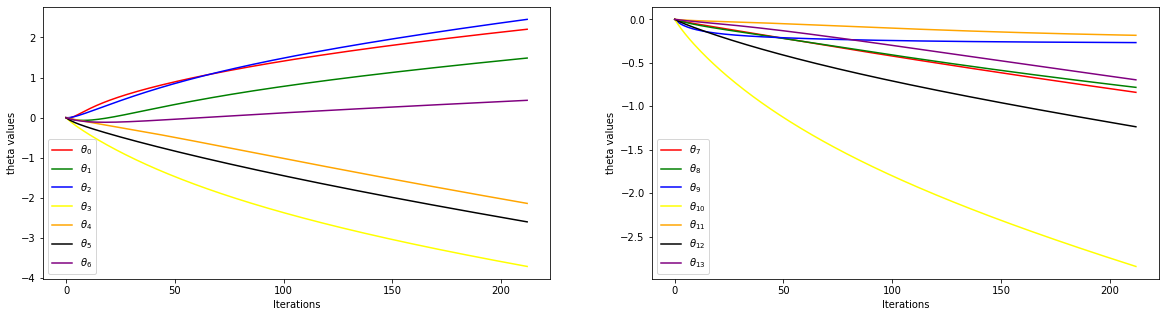

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
for i in range(int(theta.shape[0]/4)):
  plt.plot(thetas_list[:, i][0:len(thetas_list[:, i])], color=colors[i], label='$\\theta_{'+str(i)+'}$')
plt.xlabel("Iterations")
plt.ylabel("theta values")
plt.legend()
lim = 2 * int(theta.shape[0]/4)
plt.subplot(1, 2, 2) # index 2
for i in range(int(theta.shape[0]/4), 2 * int(theta.shape[0]/4)):
  plt.plot(thetas_list[:, i][0:len(thetas_list[:, i])], color=colors[i%7], label='$\\theta_{'+str(i)+'}$')
plt.xlabel("Iterations")
plt.ylabel("theta values")
plt.legend()

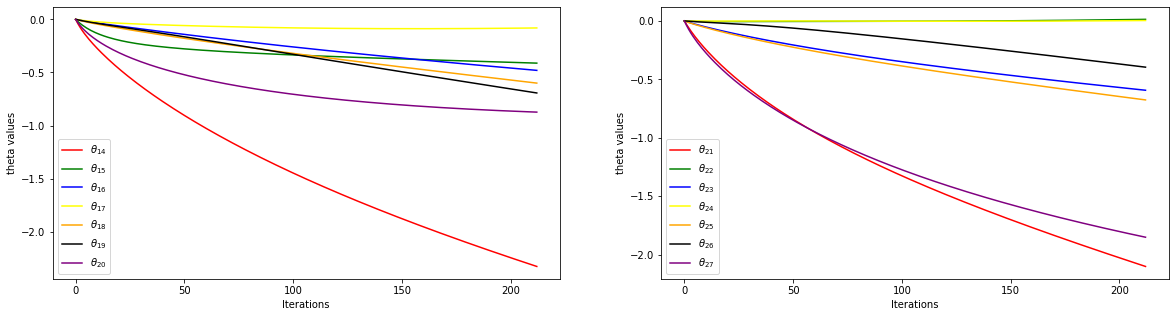

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

lim = 3 * int(theta.shape[0]/4)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
for i in range(2 * int(theta.shape[0]/4), 3 * int(theta.shape[0]/4)):
  plt.plot(thetas_list[:, i][0:len(thetas_list[:, i])], color=colors[i%7], label='$\\theta_{'+str(i)+'}$')
plt.xlabel("Iterations")
plt.ylabel("theta values")
plt.legend()

lim = 4 * int(theta.shape[0]/4)
plt.subplot(1, 2, 2) # index 2
for i in range(3 * int(theta.shape[0]/4), 4 * int(theta.shape[0]/4)):
  plt.plot(thetas_list[:, i][0:len(thetas_list[:, i])], color=colors[i%7], label='$\\theta_{'+str(i)+'}$')
plt.xlabel("Iterations")
plt.ylabel("theta values")
plt.legend()

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [ ]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X2, theta)
prcision = np.mean(y==y_pred)*100
prcision

83.05084745762711

In [ ]:
precision_score(y, y_pred)

0.796875

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression, Ridge
logisticRegr = LogisticRegression(penalty='l2')

In [ ]:
logisticRegr.fit(X2[:, 1:], y.ravel())

LogisticRegression()

In [ ]:
sklearnTheta = np.concatenate([logisticRegr.intercept_, logisticRegr.coef_[0, :]])
sklearnTheta

array([ 1.27271075,  0.62536719,  1.18095854, -2.01961804, -0.91752388,
       -1.43170395,  0.12391867, -0.36536954, -0.35715555, -0.17501434,
       -1.45827831, -0.05112356, -0.61575808, -0.27472128, -1.19276292,
       -0.24241519, -0.20587922, -0.0448395 , -0.27780311, -0.29535733,
       -0.45625452, -1.04347339,  0.02770608, -0.29252353,  0.01550105,
       -0.32746466, -0.1439423 , -0.92460358])

In [ ]:
preds = logisticRegr.predict(X2[:, 1:])
prc = np.mean(y==preds)*100
prc

49.87072680264292

In [ ]:
precision_score(y, preds)

0.7794117647058824

In [ ]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

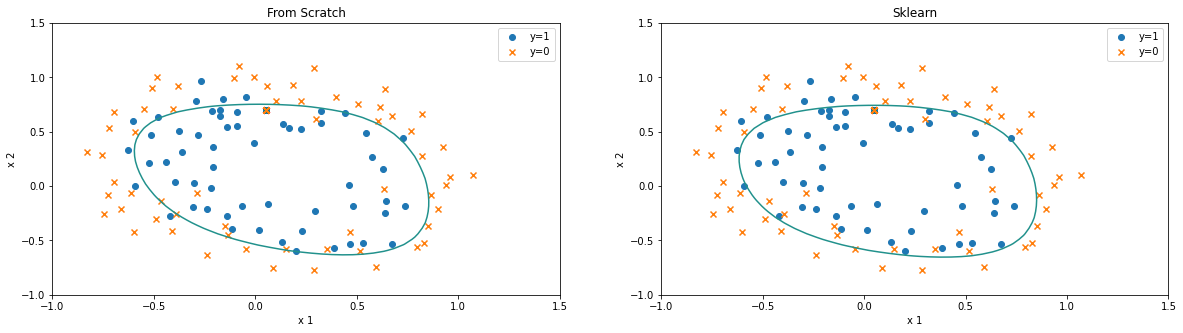

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(drawCircle(u[i], v[j]), theta)
plt.contour(u,v,z,0)
plt.xlabel('x 1')
plt.ylabel('x 2')
plt.title('From Scratch')
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(drawCircle(u[i], v[j]), sklearnTheta)
plt.contour(u,v,z,0)
plt.xlabel('x 1')
plt.ylabel('x 2')
plt.title('Sklearn')
plt.legend()


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

il existe une fonction dans la librairie scipy qui permet d'avoir les valeurs optimal pour un algorithme de décente de gradent donné en fonction de sa fonction cout

In [ ]:
import scipy.optimize as opt

In [ ]:
def lrCostFunction(theta_t, X_t, y_t, lambda_t):
    m = len(y_t)
    J = (-1/m) * (y_t.T @ np.log(Sigmoid(X_t @ theta_t)) + (1 - y_t.T) @ np.log(1 - Sigmoid(X_t @ theta_t)))
    reg = (lambda_t/(2*m)) * (theta_t[1:].T @ theta_t[1:])
    J = J + reg
    return J

In [ ]:
def lrGradientDescent(theta, X, y, lambda_t):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * X.T @ (Sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

In [ ]:
output = opt.fmin_tnc(func = lrCostFunction, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X2, y.flatten(), 1))
thetaopt = output[0]
print(output[0]) # les valeurs optimal de theta 

[ 1.27273258  0.62528023  1.18110577 -2.01996107 -0.91746016 -1.43169292
  0.12403117 -0.36550152 -0.35725554 -0.17520786 -1.45812915 -0.05097392
 -0.61551469 -0.27472713 -1.19275321 -0.24214413 -0.20605542 -0.04476694
 -0.27777932 -0.29537691 -0.45631467 -1.04324804  0.02775769 -0.2924179
  0.01553576 -0.32735816 -0.14383493 -0.92464732]


Ces valeurs ci représente les valeurs optimal d'une regression logistique basé sur une décente de gradient et fonction cout et de nos donnée

In [ ]:
y2_pred=predict(X2, thetaopt)
prcision2 = np.mean(y==y2_pred)*100
prcision2

49.87072680264292

In [ ]:
precision_score(y, y2_pred)

0.7794117647058824

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


In [ ]:
# bonne chance